# 标定数据处理与分析
* 罗翊杰 
* 1951578@tongji.edu.cn
* MERCI Project
* 2023/4/15

### 1. 数据载入
time,x,y,d,press,skin0_x,skin0_y,skin0_z,skin1_x,skin1_y,skin1_z,skin2_x,skin2_y,skin2_z,skin3_x,skin3_y,skin3_z


In [1]:
import numpy as np
# 不同弹性体厚度分析，载入5组数据
# 数据集路径
tset_path = {
    "p1":'./../Data/TSET_pressdown/p1.csv',
    "p2":'./../Data/TSET_pressdown/p2.csv',
    "p3":'./../Data/TSET_pressdown/p3.csv',
    "p4":'./../Data/TSET_pressdown/p4.csv',
}
# 载入数据
tset = {}
for t in tset_path:
    print('loading:'+tset_path[t]+'...',end='',flush=True)
    with open(tset_path[t]) as f:
        tset[t] = np.loadtxt(f,delimiter=",",skiprows=1) 
    print('[ok]') 



loading:./../Data/TSET_pressdown/p1.csv...[ok]
loading:./../Data/TSET_pressdown/p2.csv...[ok]
loading:./../Data/TSET_pressdown/p3.csv...[ok]
loading:./../Data/TSET_pressdown/p4.csv...[ok]


In [2]:
# 获取原始数据
import numpy as np
import ctypes
mags1 = []
force = []
for t in tset:
    data = tset[t]
    length = len(data)
    # 获取磁场数据，触点水平位置数据和压力数据
    magnetic = []
    position = []
    press = []
    for i,frame in enumerate(data):
        force_raw =  ctypes.c_int16(int(frame[20])).value*65536 + int(frame[21])
        mag_raw = [frame[4], frame[5], frame[6]]
        magnetic.append(mag_raw)
        press.append(force_raw)
    mag_ = np.array(magnetic)
    force_ = np.array(press)
    
    mags1.append(mag_)
    force.append(force_)


[-18542 -18542 -18542 ...   6414   6414   6414]
[-18475 -18475 -18467 ...  24225  24224  24223]
[-18524 -18524 -18524 ...  32500  32500  32500]
[-18535 -18535 -18535 ...  26448  26448  26439]


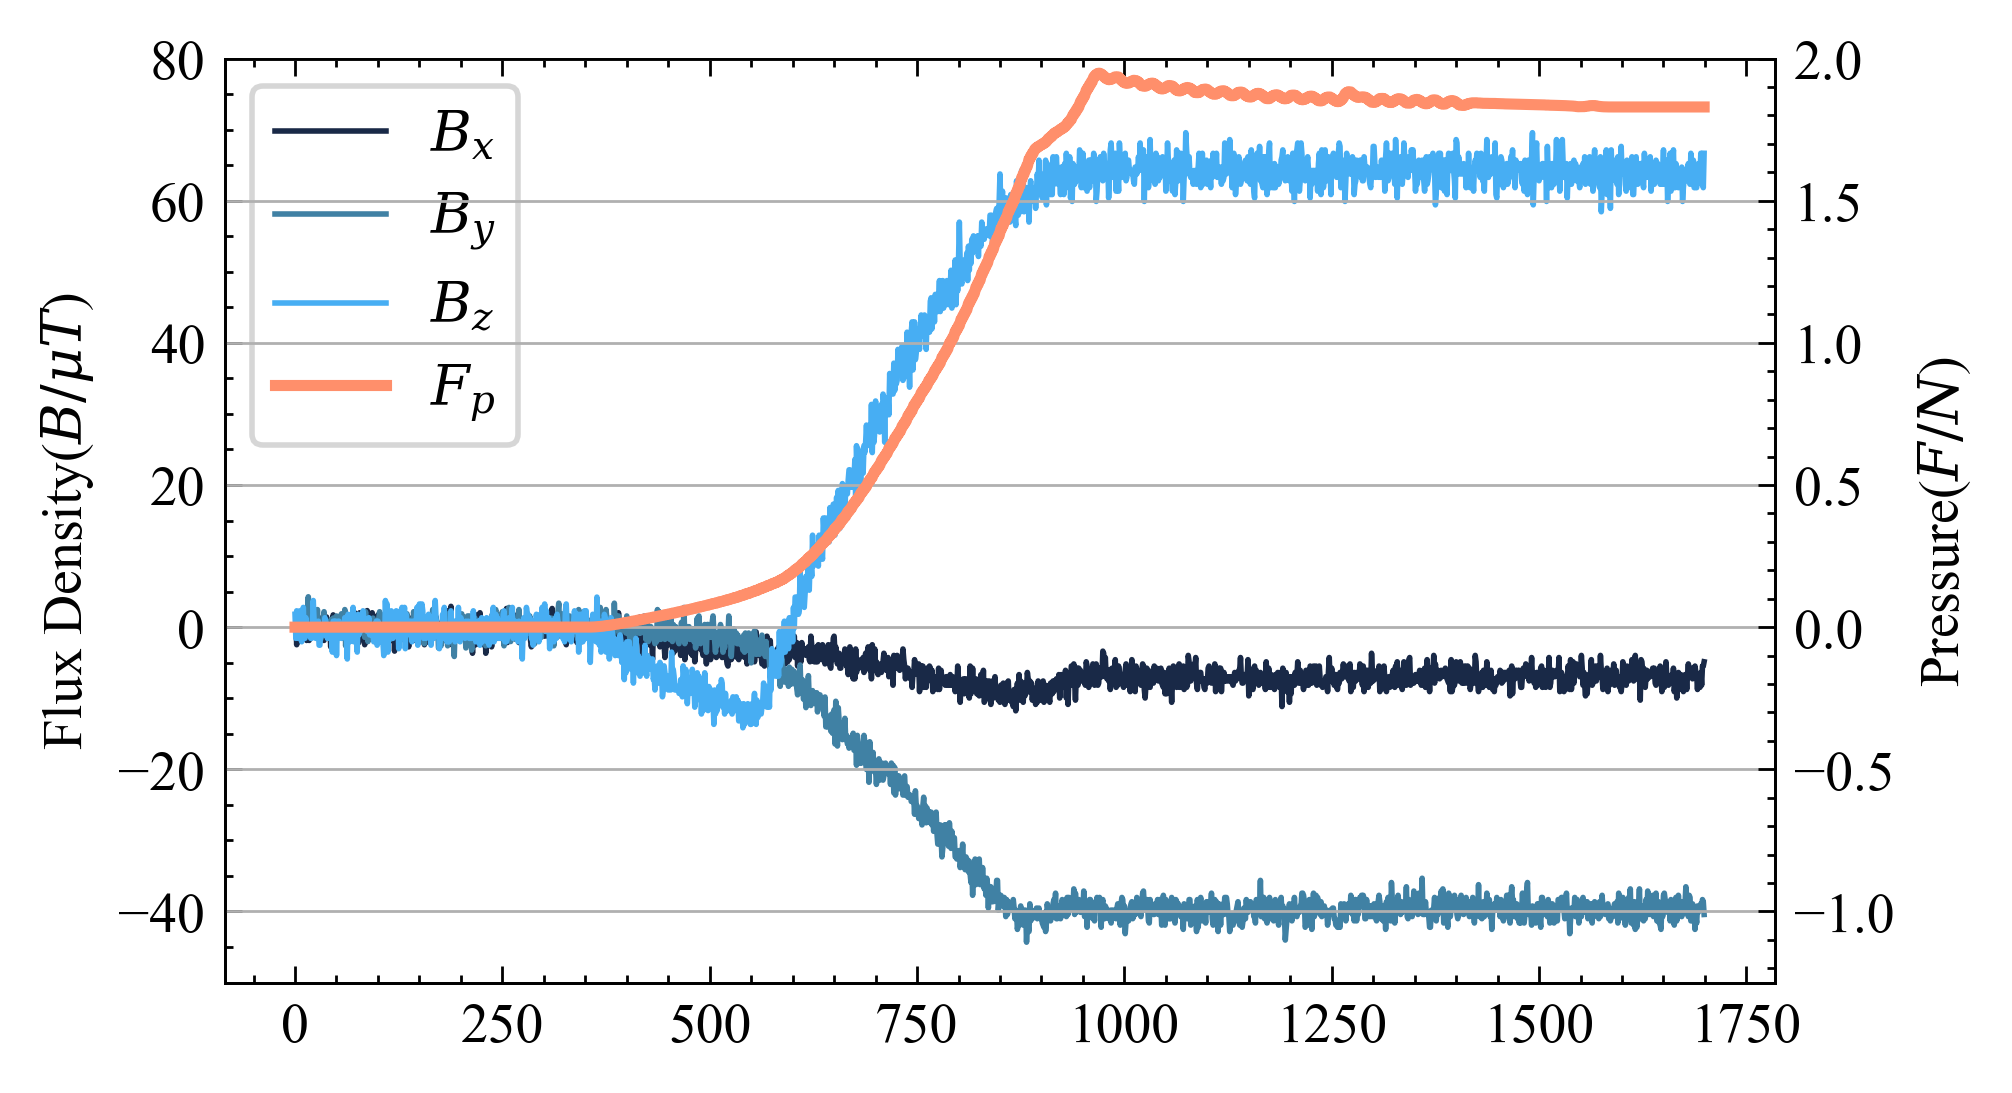

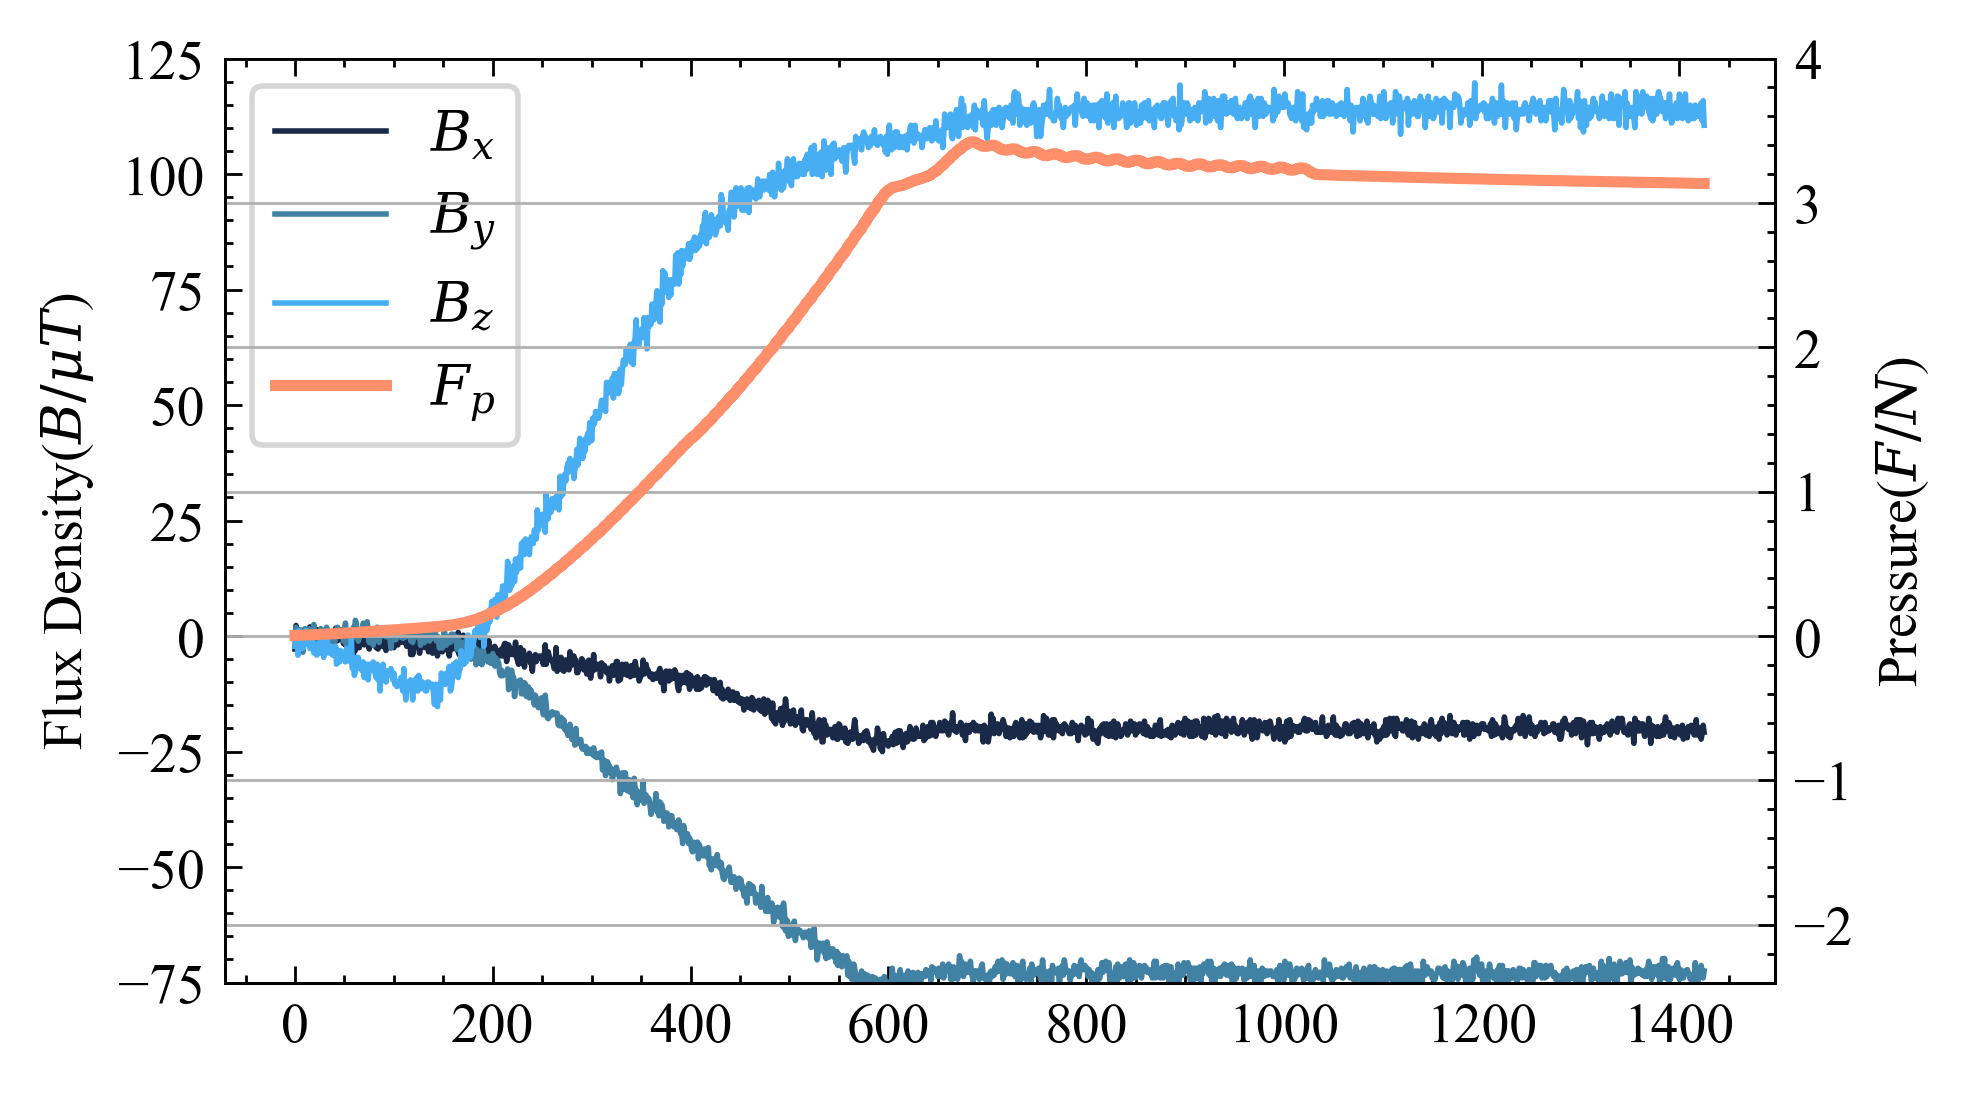

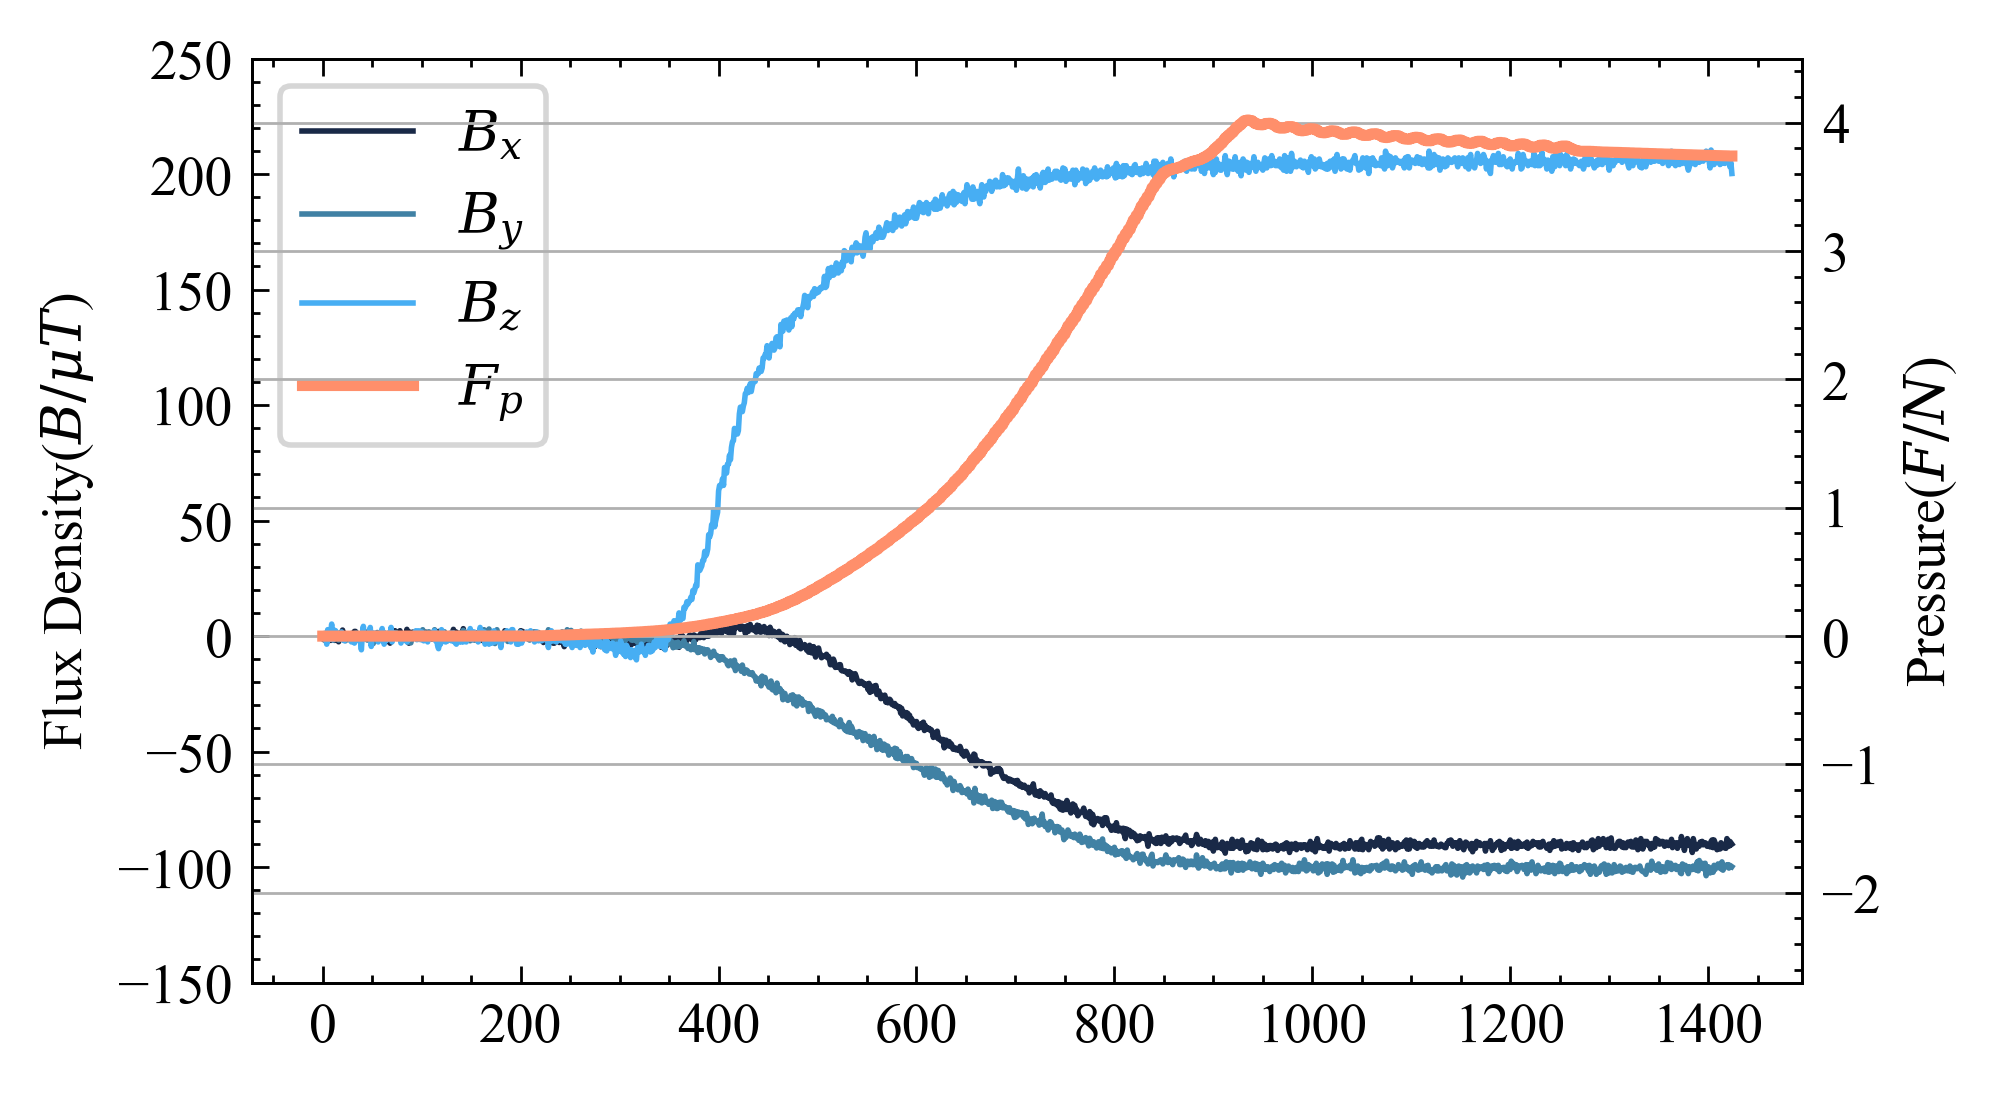

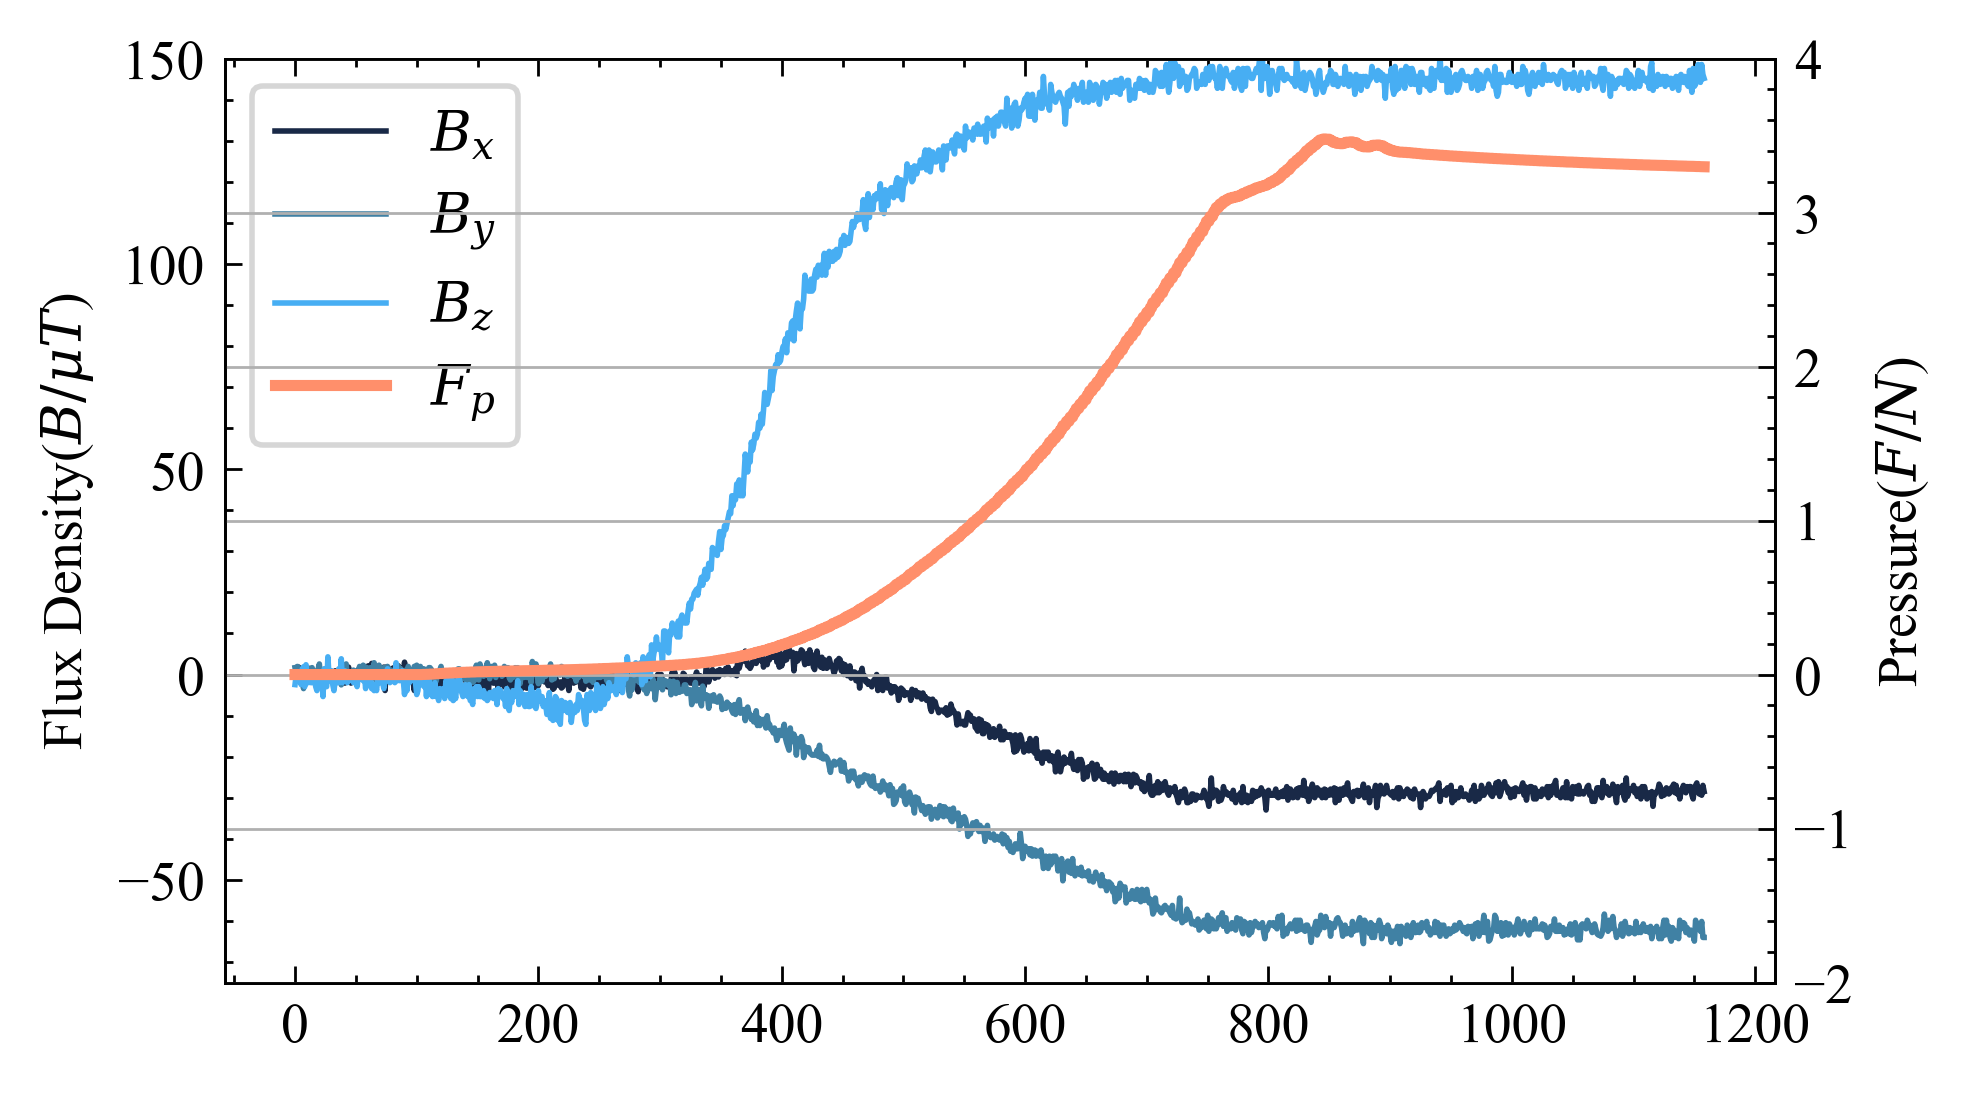

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots

color_table = ['#192947','#4081A4','#88C0C1','#47aef3']
limdata = [[-50,80,-1.25,2],[-75,125,-2.4,4],[-150,250,-2.7,4.5],[-75,150,-2.0,4.0]]
names = ['P1','P2','P3','P4']
for t in range(4):
    force_zero = np.average(force[t][0:100])
    magx_zero = np.average(mags1[t][0:100,0])
    magy_zero = np.average(mags1[t][0:100,1])
    magz_zero = np.average(mags1[t][0:100,2])
    with plt.style.context(['science']):
        plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
        plt.rcParams['savefig.dpi'] = 400 #图片像素
        plt.rcParams['figure.dpi'] = 400 #分辨率
        plt.rcParams["legend.frameon"] = True
        plt.rcParams['text.usetex'] = False
        plt.rc('font',family='Times New Roman') 
        fig,ax1 = plt.subplots(figsize=(5, 3))
        ax2 = ax1.twinx()           # 做镜像处理
        lns1 = ax1.plot(mags1[t][300:2000,0]-magx_zero,linewidth=1,color=color_table[0],label='$B_x$')
        lns2 = ax1.plot(mags1[t][300:2000,1]-magy_zero,linewidth=1,color=color_table[1],label='$B_y$')
        lns3 = ax1.plot(mags1[t][300:2000,2]-magz_zero,linewidth=1,color=color_table[3],label='$B_z$')
        lns4 = ax2.plot((force[t][300:2000]-force_zero)/133.663 * 0.0098,linewidth=2,color='#ff8f6b',label='$F_p$')
        ax1.set_ylabel('Flux Density($B/\mu T$)')   #设置Y1轴标题
        ax2.set_ylabel('Pressure($F/N$)')   #设置Y2轴标题
        ax1.set_ylim(limdata[t][0],limdata[t][1])
        ax2.set_ylim(limdata[t][2],limdata[t][3])
        
        lns = lns1+lns2+lns3+lns4
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc=0)
        
        #ax2.legend()
        plt.grid()
        # plt.title('Press on ' + names[t])
            
plt.show()

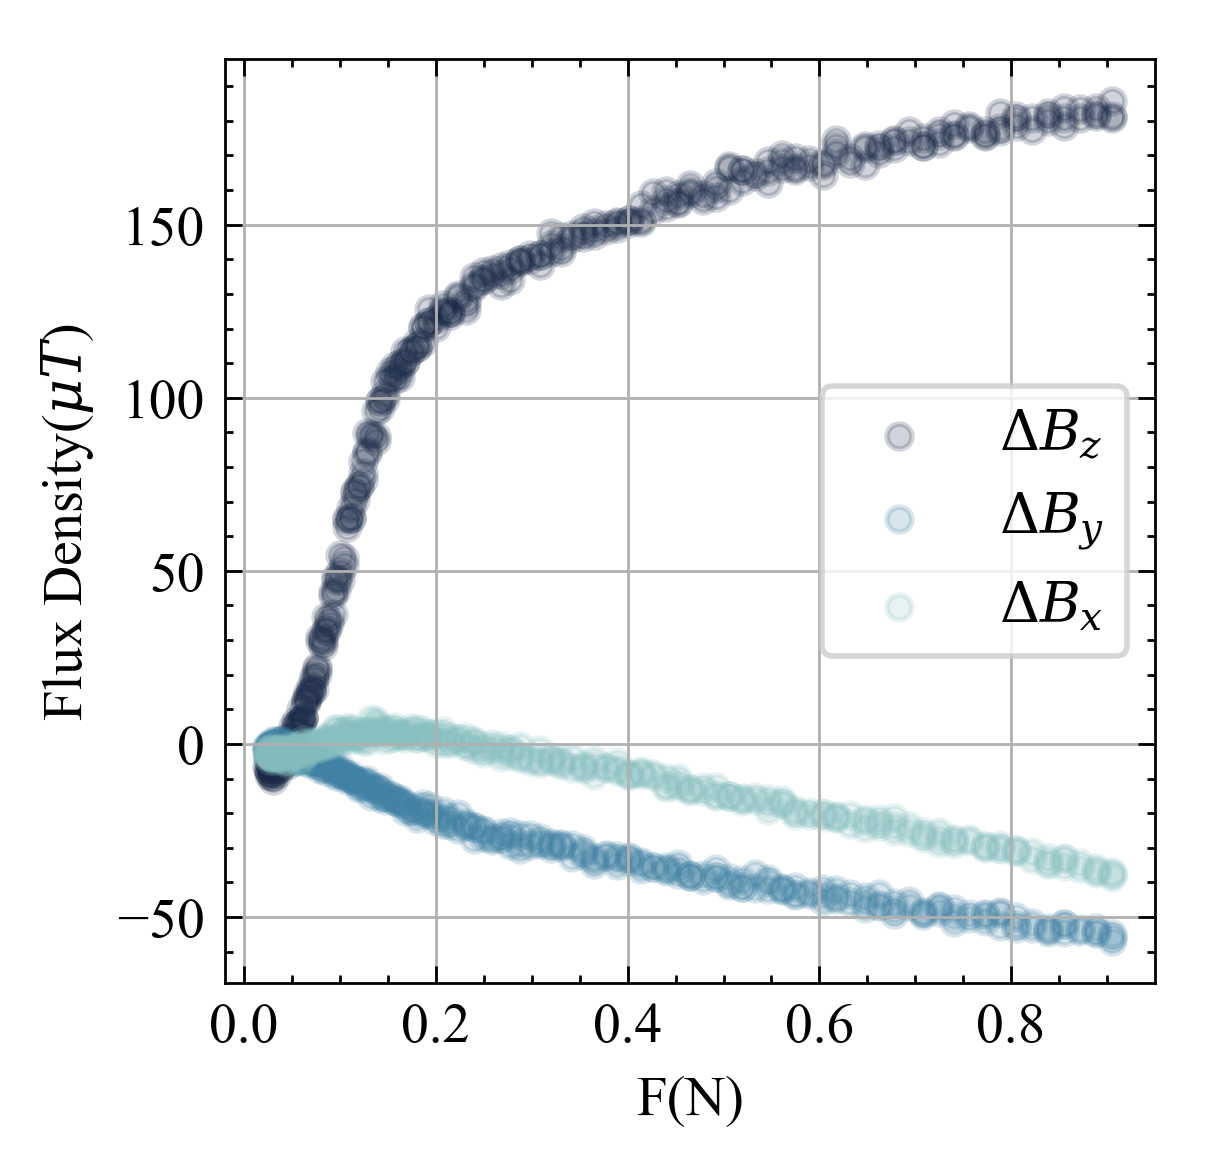

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots
import numpy as np
import pandas as pd
import seaborn as sns

color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']
limdata = [[-50,80,-1.25,2],[-75,125,-2.4,4],[-150,250,-2.7,4.5],[-75,150,-2.0,4.0]]
names = ['P1','P2','P3','P4']
for t in range(2,4):
    force_zero = np.average(force[t][0:100])
    magx_zero = np.average(mags1[t][0:100,0])
    magy_zero = np.average(mags1[t][0:100,1])
    magz_zero = np.average(mags1[t][0:100,2])
    f = (force[t][600:900]-force_zero)/133.663 * 0.0098
    x = mags1[t][ 600:900,0]-magx_zero
    y = mags1[t][ 600:900,1]-magy_zero
    z = mags1[t][ 600:900,2]-magz_zero
    with plt.style.context(['science']):
        plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
        plt.rcParams['savefig.dpi'] = 400 #图片像素
        plt.rcParams['figure.dpi'] = 400 #分辨率
        plt.rcParams["legend.frameon"] = True
        plt.rcParams['text.usetex'] = False
        plt.rc('font',family='Times New Roman') 
        fig, ax = plt.subplots(figsize=(3, 3))
        df = pd.DataFrame({'x': x, 'y': y,'z':z,'f':f})
        sns.regplot(x='f', y='z', data=df,
                   order = 1,
                   ci=100,
                   scatter_kws={'s': 20,'alpha':0.2},
                   truncate=True,
                   fit_reg=False,
                   ax=ax,
                   label='$\Delta B_z$',
                   color=color_table[0])
        sns.regplot(x='f', y='y', data=df,
                   order = 1,
                   ci=100,
                   scatter_kws={'s': 20,'alpha':0.2},
                   truncate=True,
                   fit_reg=False,
                   ax=ax,
                   label='$\Delta B_y$',
                   color=color_table[1])
        sns.regplot(x='f', y='x', data=df,
                   order = 1,
                   ci=100,
                   scatter_kws={'s': 20,'alpha':0.2},
                   truncate=True,
                   ax=ax,
                   fit_reg=False,
                   label='$\Delta B_x$',
                   color=color_table[2])
        ax.legend()
        ax.set_ylabel('Flux Density($\mu T$)')
        ax.set_xlabel('F(N)')
        # ax.set_title('Press on P4')
        # sns.lmplot(x='f', y='x', data=df,
        #            order = 2,
        #            ci=100,
        #            scatter_kws={'s': 20,'alpha':0.2},
        #            truncate=False,ax=ax)
        plt.grid()
    break
plt.show()